# Introduction

- In the `Cleansing & Exploration.ipynb` I have explored the data and got to know a little bit more about the insight it holds.

- In this notebook, I am going to use the same dataset to segment customers into different groups to help making the decision on how company best approach each group of customer.

- The dataset can be obtained from https://archive.ics.uci.edu/dataset/222/bank+marketing

# Import Libraries and Data

In [2]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Add Customer ID

Create a `customer_id` column using combination of `age`, `job`, `marital`, `education`, `housing`, and `loan` columns.

In [7]:
# Add customer ID

df["customer_id"] = df["age"].astype(str) + '_' + df["job"].astype(str) + '_' + df["marital"].astype(str) + '_' + \
                      df["education"].astype(str) + '_' + df["housing"].astype(str) + '_' + df["loan"]
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,customer_id
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,56_housemaid_married_basic.4y_no_no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,57_services_married_high.school_no_no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,37_services_married_high.school_yes_no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,40_admin._married_basic.6y_no_no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,56_services_married_high.school_no_yes


# Segmentation

## Step 1

- Simple statistics to understand the distribution for the variables I'm interested in.

- I will try by looking into the `mean`, `median`, `minimum value`, `maximum value`, `25th percentile`, `75th percentile`, and `95th percentile`.

Calculate the response rate for every customer and campaign.  
By dividing `count_respond` and `contact_per_campaign`.

In [8]:
# Find the number of row by customer_id and campaign.
campaign_count = pd.DataFrame(df.groupby(["customer_id", "campaign"]).size())

# Rename the result column into `contact_per_campaign`
campaign_count.rename(columns={0:"contact_per_campaign"}, inplace=True)

# Show the first 5 row
campaign_count.head()

contact_per_campaign
customer_id                                campaign                      
17_student_single_basic.9y_unknown_unknown 2                            1
17_student_single_basic.9y_yes_no          2                            1
                                           3                            1
17_student_single_unknown_no_yes           1                            1
17_student_single_unknown_yes_no           3                            1

In [9]:
# Find the number of row by customer_id, campaign, and y.
campaign_respond_count = pd.DataFrame(df.groupby(["customer_id", "campaign", "y"]).size())

# Rename the result column into `count_respond`
campaign_respond_count.rename(columns={0:"count_respond"}, inplace=True)

# Only get the result where y = yes
campaign_respond_count = campaign_respond_count.loc[(slice(None), slice(None), "yes"), :]

# Show the first 5 row
campaign_respond_count.head()

,,,count_respond
customer_id,campaign,y,
17_student_single_basic.9y_unknown_unknown,2,yes,1
17_student_single_unknown_no_yes,1,yes,1
18_student_single_basic.4y_yes_no,1,yes,1
18_student_single_basic.6y_no_yes,2,yes,1
18_student_single_basic.9y_no_no,2,yes,1


In [10]:
# Merge campaign_respond_count with campaign_count
campaign_response = campaign_respond_count.merge(campaign_count, left_index=True, right_index=True)

# Calculate response_rate
campaign_response["response_rate"] = campaign_response["count_respond"] / campaign_response["contact_per_campaign"]

# Show the first 5 row
campaign_response.head()

,,,count_respond,contact_per_campaign,response_rate
customer_id,campaign,y,,,
17_student_single_basic.9y_unknown_unknown,2,yes,1,1,1.0
17_student_single_unknown_no_yes,1,yes,1,1,1.0
18_student_single_basic.4y_yes_no,1,yes,1,2,0.5
18_student_single_basic.6y_no_yes,2,yes,1,1,1.0
18_student_single_basic.9y_no_no,2,yes,1,1,1.0


Next to prepare some data:
  1. `contact_frequency`: Frequency of contact per `customer_id`
  2. `sum_duration_of_contact`: Sum of duration of all contact per `customer_id`
  3. `avg_duration_of_contact`: Average of duration of all contact per `customer_id`
  4. `campaign_engagement_cnt`: Number of unique campaign per `customer_id`

In [11]:
# Aggregate data per customer_id
customer_agg = df.groupby("customer_id").agg({"customer_id":"count",
                                              "duration":["sum","mean"],
                                              "campaign":"nunique"
                                              })

# If multiindex, use the code below to flatten the columns
customer_agg.columns = customer_agg.columns.get_level_values(1)

# Rename the columns appropriately
customer_agg.rename(columns={"count": "contact_frequency",
                             "sum": "sum_duration_of_contact",
                             "mean": "avg_duration_of_contact",
                             "nunique": "campaign_engagement_cnt"
                             }, inplace=True)

# Show the first 5 row
customer_agg.head()

,contact_frequency,sum_duration_of_contact,avg_duration_of_contact,campaign_engagement_cnt
customer_id,,,,
17_student_single_basic.9y_unknown_unknown,1,498,498.0,1
17_student_single_basic.9y_yes_no,2,274,137.0,2
17_student_single_unknown_no_yes,1,896,896.0,1
17_student_single_unknown_yes_no,1,432,432.0,1
18_student_single_basic.4y_no_no,1,108,108.0,1


- Next, I want to categorize each `campaign_engagement_cnt`.

- This step of labelling helps to convert a numerical variable into a categorical one.

- This step is often usefull in translating data into a more digestable form, depending on business domain.

- In this case, based on business domain, I want to categorize them into a new variable called `campaign_engagement_level`:

|Group | Label |
|-|-|
|`campaign_engagement_cnt` = 1| `1 Campaign`|
|1 < `campaign_engagement_cnt` < 5| `2-4 Campaign`|
|`campaign_engagement_cnt` >= 5| `5+ Campaign`|

In [14]:
# Label for `1 Campaign`
customer_agg.loc[customer_agg["campaign_engagement_cnt"] == 1,"campaign_engagement_level"] = "1 Campaign"

# Label for `2-4 Campaign`
customer_agg.loc[(customer_agg["campaign_engagement_cnt"] > 1) & (customer_agg["campaign_engagement_cnt"] < 5),"campaign_engagement_level"] = "2-4 Campaigns"

# Label for `5+ Campaign`
customer_agg.loc[customer_agg["campaign_engagement_cnt"] >= 5,"campaign_engagement_level"] = "5+ Campaigns"

# Check if the logic works by showing the first 5 row
customer_agg.head()

,contact_frequency,sum_duration_of_contact,avg_duration_of_contact,campaign_engagement_cnt,campaign_engagement_level
customer_id,,,,,
17_student_single_basic.9y_unknown_unknown,1,498,498.0,1,1 Campaign
17_student_single_basic.9y_yes_no,2,274,137.0,2,2-4 Campaigns
17_student_single_unknown_no_yes,1,896,896.0,1,1 Campaign
17_student_single_unknown_yes_no,1,432,432.0,1,1 Campaign
18_student_single_basic.4y_no_no,1,108,108.0,1,1 Campaign


In [15]:
# Sanity check the result by aggregating row count for every `campaign_engagement_level` and `campaign_engagement_cnt`
customer_agg.groupby(["campaign_engagement_level", "campaign_engagement_cnt"]).size()

campaign_engagement_level  campaign_engagement_cnt
1 Campaign                 1                          5680
2-4 Campaigns              2                          2234
                           3                          1102
                           4                           630
5+ Campaigns               5                           362
                           6                           213
                           7                           138
                           8                            67
                           9                            24
                           10                           14
                           11                            2
                           12                            1
                           13                            2
dtype: int64

- Now that I have 2 DataFrames for campaign response per `customer_id` (`campaign_response`) and statistics per `customer_id` (`customer_agg`), I will combine them to finally explore the distribution of the data.

- Merge the two DataFrame's by `customer_id` into a new DataFrame called `campaign_merge`.

In [16]:
campaign_merge = campaign_response.merge(customer_agg, how="inner", left_index=True, right_index=True)
campaign_merge.head()

,,,count_respond,contact_per_campaign,response_rate,contact_frequency,sum_duration_of_contact,avg_duration_of_contact,campaign_engagement_cnt,campaign_engagement_level
customer_id,campaign,y,,,,,,,,
17_student_single_basic.9y_unknown_unknown,2,yes,1,1,1.0,1,498,498.0,1,1 Campaign
17_student_single_unknown_no_yes,1,yes,1,1,1.0,1,896,896.0,1,1 Campaign
18_student_single_basic.4y_yes_no,1,yes,1,2,0.5,2,548,274.0,1,1 Campaign
18_student_single_basic.6y_no_yes,2,yes,1,1,1.0,1,368,368.0,1,1 Campaign
18_student_single_basic.9y_no_no,2,yes,1,1,1.0,1,412,412.0,1,1 Campaign


- Now I want to check the distribution.

- Aggregate these values:
  - minimum
  - average
  - maximum
  - 25th percentile
  - 50th percentile
  - 75th percentile
  - 95th percentile

In [17]:
# Defining function for 25th Percentile
def p25(x):
    return np.percentile(x,0.25)


# Defining function for 50th Percentile
def p50(x):
    return np.percentile(x,0.5)


# Defining function for 75th Percentile
def p75(x):
    return np.percentile(x,0.75)


# Defining function for 95th Percentile
def p95(x):
    return np.percentile(x,0.95)

In [18]:
# Calculate distribution statistics for response_rate per campaign_engagement_level
campaign_engagement_level = campaign_merge.groupby("campaign_engagement_level").agg({"response_rate": ["min", "mean", "max", p25, p50, p75, p95]})

# Flatten multiindex column
campaign_engagement_level.columns = campaign_engagement_level.columns.get_level_values(1)

# Reset index
campaign_engagement_level.reset_index(inplace=True)

# Show the result
campaign_engagement_level

,campaign_engagement_level,min,mean,max,p25,p50,p75,p95
0,1 Campaign,0.166667,0.880680,1.0,0.200000,0.250000,0.250000,0.250000
1,2-4 Campaigns,0.071429,0.661390,1.0,0.090909,0.100000,0.111111,0.111111
2,5+ Campaigns,0.038462,0.371066,1.0,0.047608,0.049976,0.050000,0.052632


1. Which campaign engagement level has a better chance of response?
- 1 Campaign: This level has the **highest** mean response rate (0.880680), suggesting that customers who were engaged with **only one campaign** have the **highest likelihood of responding**.
- 2-4 Campaigns: This level has a **moderate** mean response rate (0.661390), indicating a **decent chance of response** but not as high as the 1 Campaign level.
- 5+ Campaigns: This level has the **lowest** mean response rate (0.371066), indicating that **customers engaged with more than five campaigns have the least likelihood** of responding.  

  
2. Which campaign engagement level has a skewed distribution?  
    To determine the skewness of the distribution, we can look at the difference between the mean and median (p50):

-  1 Campaign:

    - **Mean:** 0.880680
    - **Median (p50):** 0.250000
    - **Difference:** 0.630680 (indicating a **positive skew**, with the mean being **much higher** than the median)

- 2-4 Campaigns:

    - **Mean:** 0.661390
    - **Median (p50):** 0.100000
    - **Difference:** 0.561390 (indicating a **positive skew**, with the mean being **higher** than the median)

- 5+ Campaigns:

    - **Mean:** 0.371066
    - **Median (p50):** 0.049976
    - **Difference:** 0.321090 (indicating a **positive skew**, but **less pronounced** than the other levels)

The **1 Campaign** level has the most skewed distribution, as indicated by the largest difference between the mean and median. This suggests that while the average response rate is high, there is a significant portion of customers with much lower response rates, creating a positively skewed distribution.

In [19]:
# Melt the previous DataFrame and save it into a new DataFrame called campaign_engagement_melt

campaign_engagement_melt = pd.melt(campaign_engagement_level, id_vars=["campaign_engagement_level"], value_vars=["min", "mean", "max", "p25", "p50", "p75", "p95"])
campaign_engagement_melt.head(10)

,campaign_engagement_level,variable,value
0,1 Campaign,min,0.166667
1,2-4 Campaigns,min,0.071429
2,5+ Campaigns,min,0.038462
3,1 Campaign,mean,0.880680
4,2-4 Campaigns,mean,0.661390
5,5+ Campaigns,mean,0.371066
6,1 Campaign,max,1.000000
7,2-4 Campaigns,max,1.000000
8,5+ Campaigns,max,1.000000
9,1 Campaign,p25,0.200000


In [20]:
# Plot using Plotly
fig = px.bar(campaign_engagement_melt, 
             x='campaign_engagement_level', 
             y='value', 
             color='variable', 
             barmode='group',
             facet_col='variable',
             labels={'value': 'Response Rate', 'campaign_engagement_level': 'Campaign Engagement Level'},
             title='Campaign Engagement Levels: Mean vs Median Response Rates')

fig.show()

## Step 2: Define Engagement Level Labels

- Define engagement level labels that align with the stakeholders' objectives.
- For example:
  - Highly Engaged:
    - Customers who have high contact frequency, long duration of contact, and high campaign engagement.
  - Moderately Engaged:
    - Customers with moderate contact frequency, duration of contact, and campaign engagement.
  - Low Engagement:
    - Customers with low contact frequency, short duration of contact, and low campaign engagement.


- In this step the data team usually give insight about the distribution of the data, but the segmentation is done by multiple teams to combine as much context as possible.

- The definition has been provided below through communication and deliberation with the other teams in the company.

In [21]:
# Describe numerical columns
campaign_merge.describe()

,count_respond,contact_per_campaign,response_rate,contact_frequency,sum_duration_of_contact,avg_duration_of_contact,campaign_engagement_cnt
count,3693.000000,3693.000000,3693.000000,3693.000000,3693.000000,3693.000000,3693.000000
mean,1.256431,3.796913,0.617485,12.070674,3388.010019,349.944110,3.617113
std,0.760296,4.769829,0.352509,15.324696,3989.388900,221.040406,2.377360
min,1.000000,1.000000,0.038462,1.000000,63.000000,44.000000,1.000000
25%,1.000000,1.000000,0.285714,2.000000,774.000000,231.857143,2.000000
50%,1.000000,2.000000,0.500000,6.000000,1840.000000,287.000000,3.000000
75%,1.000000,4.000000,1.000000,17.000000,4617.000000,390.733333,5.000000
max,10.000000,54.000000,1.000000,114.000000,26895.000000,2926.000000,13.000000


## Step 3: Calculate score based on threshold

- To make it simple, below is the definition and the thresholds that I will need to segment every customer based on different variables.

- Each will be converted to a score between `1 and 3` and later, we will combine all the composite variables into a single score based on pre-defined weight.

</br>
</br>

### Contact Frequency

| |Engagement Level|Threshold/Range|
|-|-|-|
|1|Low Engagement	|<= 2|
|2|Moderately Engaged	|> 2 and <= 4|
|3|Highly Engaged|	> 4|


</br>
</br>


### Duration of Contact

| |Engagement Level|Threshold/Range|
|-|-|-|
|1|Low Engagement	|<= 500|
|2|Moderately Engaged|	> 500 and <= 1000|
|3|Highly Engaged|	> 1000|



</br>
</br>


### Average Duration of Contact

| |Engagement Level|Threshold/Range|
|-|-|-|
|1|Low Engagement	|<= 200|
|2|Moderately Engaged|	> 200 and <= 400|
|3|Highly Engaged|	> 400|



</br>
</br>


### Campaign Engagement

| |Engagement Level|Threshold/Range|
|-|-|-|
|1|Low Engagement	|1 campaign|
|2|Moderately Engaged|2-4 campaign|
|3|Highly Engaged|5+ campaign|


</br>
</br>


### Campaign Conversion Rate

| | |Engagement Level|Threshold/Range|
|-|-|-|-|
|1|1 campaign|	Low Engagement|	<= 0.5|
|2| |Moderately Engaged|	> 0.5 and <= 0.75|
|3| |Highly Engaged|	> 0.75|
|1|2-4 campaign|	Low Engagement|	<= 0.5|
|2| |Moderately Engaged|	> 0.5 and <= 0.75|
|3| |Highly Engaged|	> 0.75|
|1|5+ campaign|	Low Engagement|	<= 0.25|
|2| |Moderately Engaged|	> 0.25 and <= 0.5|
|3| |Highly Engaged|	> 0.5|

In [97]:
# copy campaign_merge into a new DataFrame called campaign_score
campaign_score = campaign_merge.copy()

# reset index
campaign_score.reset_index(inplace=True)

# show first 5 rows
campaign_score.head()

,customer_id,campaign,y,count_respond,contact_per_campaign,response_rate,contact_frequency,sum_duration_of_contact,avg_duration_of_contact,campaign_engagement_cnt,campaign_engagement_level
0,17_student_single_basic.9y_unknown_unknown,2,yes,1,1,1.0,1,498,498.0,1,1 Campaign
1,17_student_single_unknown_no_yes,1,yes,1,1,1.0,1,896,896.0,1,1 Campaign
2,18_student_single_basic.4y_yes_no,1,yes,1,2,0.5,2,548,274.0,1,1 Campaign
3,18_student_single_basic.6y_no_yes,2,yes,1,1,1.0,1,368,368.0,1,1 Campaign
4,18_student_single_basic.9y_no_no,2,yes,1,1,1.0,1,412,412.0,1,1 Campaign


Before I move on, I want to collect the median `response_rate` per `customer_id` and put it into a new column called `campaign_rate_per_customer`

In [98]:
# Get 50th percentile response_rate, group by customer_id. Save it into campaign_rate_per_customer
campaign_rate_per_customer = pd.DataFrame(campaign_score.groupby("customer_id")["response_rate"].agg(p50))

# Rename to result column to be campaign_rate_per_customer
campaign_rate_per_customer.rename(columns={"response_rate":"campaign_rate_per_customer"}, inplace=True)

# Merge campaign_score with campaign_rate_per_customer by customer_id
campaign_score = campaign_score.merge(campaign_rate_per_customer, how="left", on="customer_id")

# Show first 5 rows
campaign_score.head()

,customer_id,campaign,y,count_respond,contact_per_campaign,response_rate,contact_frequency,sum_duration_of_contact,avg_duration_of_contact,campaign_engagement_cnt,campaign_engagement_level,campaign_rate_per_customer
0,17_student_single_basic.9y_unknown_unknown,2,yes,1,1,1.0,1,498,498.0,1,1 Campaign,1.0
1,17_student_single_unknown_no_yes,1,yes,1,1,1.0,1,896,896.0,1,1 Campaign,1.0
2,18_student_single_basic.4y_yes_no,1,yes,1,2,0.5,2,548,274.0,1,1 Campaign,0.5
3,18_student_single_basic.6y_no_yes,2,yes,1,1,1.0,1,368,368.0,1,1 Campaign,1.0
4,18_student_single_basic.9y_no_no,2,yes,1,1,1.0,1,412,412.0,1,1 Campaign,1.0


Now I'm ready for the scoring process, refering to the tables above.

Get 5 parts of the composite scores:
  1. `contact_frequency_score`
  2. `duration_of_contact_score`
  3. `avg_duration_of_contact_score`
  4. `campaign_rate_score`
  5. `campaign_engagement_score`

In [99]:
# Contact frequency: contact_frequency_score

campaign_score.loc[campaign_score["contact_frequency"] <= 2,"contact_frequency_score"] = 1
campaign_score.loc[(campaign_score["contact_frequency"] > 2) & (campaign_score["contact_frequency"] <= 4),"contact_frequency_score"] = 2
campaign_score.loc[campaign_score["contact_frequency"] > 4,"contact_frequency_score"] = 3



# Duration of Contact: duration_of_contact_score

campaign_score.loc[campaign_score["sum_duration_of_contact"] <= 500,"duration_of_contact_score"] = 1
campaign_score.loc[(campaign_score["sum_duration_of_contact"] > 500) & (campaign_score["sum_duration_of_contact"] <= 1000),"duration_of_contact_score"] = 2
campaign_score.loc[campaign_score["sum_duration_of_contact"] > 1000,"duration_of_contact_score"] = 3


# Avg Duration of Contact: avg_duration_of_contact_score

campaign_score.loc[campaign_score["avg_duration_of_contact"] <= 200,"avg_duration_of_contact_score"] = 1
campaign_score.loc[(campaign_score["avg_duration_of_contact"] > 200) & (campaign_score["avg_duration_of_contact"] <= 400),"avg_duration_of_contact_score"] = 2
campaign_score.loc[campaign_score["avg_duration_of_contact"] > 400,"avg_duration_of_contact_score"] = 3


# Campaign Rate: campaign_rate_score

campaign_score.loc[(campaign_score["campaign_engagement_cnt"] < 5) & (campaign_score["campaign_rate_per_customer"] <= 0.5), "campaign_rate_score"] = 1
campaign_score.loc[(campaign_score["campaign_engagement_cnt"] < 5) & (campaign_score["campaign_rate_per_customer"] > 0.5) & (campaign_score["campaign_rate_per_customer"] <= 0.75), "campaign_rate_score"] = 2
campaign_score.loc[(campaign_score["campaign_engagement_cnt"] < 5) & (campaign_score["campaign_rate_per_customer"] > 0.75) , "campaign_rate_score"] = 3

campaign_score.loc[(campaign_score["campaign_engagement_cnt"] >= 5) & (campaign_score["campaign_rate_per_customer"] <= 0.25), "campaign_rate_score"] = 1
campaign_score.loc[(campaign_score["campaign_engagement_cnt"] >= 5) & (campaign_score["campaign_rate_per_customer"] > 0.25) & (campaign_score["campaign_rate_per_customer"] <= 0.5), "campaign_rate_score"] = 2
campaign_score.loc[(campaign_score["campaign_engagement_cnt"] >= 5) & (campaign_score["campaign_rate_per_customer"] > 0.5) , "campaign_rate_score"] = 3



# Campaign Engagement: campaign_engagement_score
campaign_score.loc[campaign_score["campaign_engagement_cnt"] == 1,"campaign_engagement_score"] = 1
campaign_score.loc[(campaign_score["campaign_engagement_cnt"] > 1) & (campaign_score["campaign_engagement_cnt"] <= 4),"campaign_engagement_score"] = 2
campaign_score.loc[campaign_score["campaign_engagement_cnt"] > 4,"campaign_engagement_score"] = 3


In [100]:
# Show the first 5 rows
campaign_score.head()

,customer_id,campaign,y,count_respond,contact_per_campaign,response_rate,contact_frequency,sum_duration_of_contact,avg_duration_of_contact,campaign_engagement_cnt,campaign_engagement_level,campaign_rate_per_customer,contact_frequency_score,duration_of_contact_score,avg_duration_of_contact_score,campaign_rate_score,campaign_engagement_score
0,17_student_single_basic.9y_unknown_unknown,2,yes,1,1,1.0,1,498,498.0,1,1 Campaign,1.0,1.0,1.0,3.0,3.0,1.0
1,17_student_single_unknown_no_yes,1,yes,1,1,1.0,1,896,896.0,1,1 Campaign,1.0,1.0,2.0,3.0,3.0,1.0
2,18_student_single_basic.4y_yes_no,1,yes,1,2,0.5,2,548,274.0,1,1 Campaign,0.5,1.0,2.0,2.0,1.0,1.0
3,18_student_single_basic.6y_no_yes,2,yes,1,1,1.0,1,368,368.0,1,1 Campaign,1.0,1.0,1.0,2.0,3.0,1.0
4,18_student_single_basic.9y_no_no,2,yes,1,1,1.0,1,412,412.0,1,1 Campaign,1.0,1.0,1.0,3.0,3.0,1.0


Now I will combine the 5 parts composite into a single final score based on the weight decided by stakeholders.

</br>

|Metric|Weight by stakeholder|
|-|-|
| Contact Frequency	| 8 |
| Duration of Contact	| 7 |
| Average Duration of Contact	| 6 |
| Campaign Engagement	| 5 |
| Campaign Conversion Rate |	9 |

</br>

In [103]:
# Calculate the final score
campaign_score["overall_engagement_score"] = (campaign_score["contact_frequency_score"] * 8) +\
                                              (campaign_score["duration_of_contact_score"] * 7) +\
                                              (campaign_score["avg_duration_of_contact_score"] * 6) +\
                                              (campaign_score["campaign_engagement_score"] * 5) +\
                                              (campaign_score["campaign_rate_score"] * 9)

The score will help to finally segment all customers based on this thresholds:

</br>

|Threshold|`engagement_category`|
|-|-|
|overall_engagement_score <=48|Low engagement|
|48 < overall_engagement_score <= 68|Moderate engagement|
|overall_engagement_score > 68|Highly engaged|

In [105]:
# Categorize based on threshold, save it into a new column called `engagement_category`

campaign_score.loc[campaign_score["overall_engagement_score"] <= 48,"engagement_category"] = "Low engagement"
campaign_score.loc[(campaign_score["overall_engagement_score"] > 48) & (campaign_score["overall_engagement_score"] <= 68),"engagement_category"] = "Moderately engaged"
campaign_score.loc[campaign_score["overall_engagement_score"] > 68,"engagement_category"] = "Highly engaged"

In [109]:
# Sanity check the result using `.value_counts()` function
campaign_score["engagement_category"].value_counts()

engagement_category
Highly engaged        2855
Moderately engaged     737
Low engagement         101
Name: count, dtype: int64

## Check the percentage

- I now have labeled every customer into different engagement category.

- The last step is to know how many of the users from each `campaign` labelled into each `engagement_category`.

- To do that, I need to create a few more DataFrame's.

- First up, get unique `customer_id` per campaign.


In [111]:
# Find unique customer_id per campagin
campaign_level_agg = df.groupby("campaign").agg({"customer_id":"nunique"})

# Rename the result column into `total_unique_customer`
campaign_level_agg.rename(columns={"customer_id":"total_unique_customer"}, inplace=True)

# Show first 5 rows
campaign_level_agg.head()

,total_unique_customer
campaign,
1,6565
2,4973
3,3153
4,1928
5,1252


In [112]:
# Find unique customer_id per campaign and y
campaign_level_respond_agg = df.groupby(["campaign", "y"]).agg({"customer_id":"nunique"})

# Rename the result column into `responded_customers`
campaign_level_respond_agg.rename(columns={"customer_id":"responded_customers"}, inplace=True)

# Get only data with y="yes"
campaign_level_respond_agg = campaign_level_respond_agg.loc[(slice(None), "yes"), :]

# Show first 5 rows
campaign_level_respond_agg.head()

,,responded_customers
campaign,y,
1,yes,1645
2,yes,994
3,yes,511
4,yes,241
5,yes,117


Get `campaign_cvr_rate` by calculating the conversion rate by dividing `responded_customers` to `total_unique_customer`

In [113]:
# Merge campaign_level_respond_agg with campaign_level_agg
campaign_level_merge = campaign_level_respond_agg.merge(campaign_level_agg, left_index=True, right_index=True)

# Calculate campaign_cvr_rate
campaign_level_merge["campaign_cvr_rate"] = campaign_level_merge["responded_customers"] / campaign_level_merge["total_unique_customer"]

# Drop index / column `y`, we don't need it anymore
campaign_level_merge = campaign_level_merge.droplevel(1)

# Show first 5 rows
campaign_level_merge.head()

,responded_customers,total_unique_customer,campaign_cvr_rate
campaign,,,
1,1645,6565,0.250571
2,994,4973,0.199879
3,511,3153,0.162068
4,241,1928,0.125000
5,117,1252,0.093450


Need to find unique `customer_id` per `campaign` and `engagement_category` and save it into a DataFrame called `campaign_engagement_agg`.

In [114]:
# Get unique customer_id per campaign and engagement_category
campaign_engagement_agg = campaign_score.groupby(["campaign", "engagement_category"]).agg({"customer_id":"nunique"})

# Rename the result column into `customer_cnt`
campaign_engagement_agg.rename(columns={"customer_id":"customer_cnt"}, inplace=True)

# Show first 10 rows
campaign_engagement_agg.head(10)

customer_cnt
campaign engagement_category              
1        Highly engaged               1161
         Low engagement                 79
         Moderately engaged            405
2        Highly engaged                784
         Low engagement                 20
         Moderately engaged            190
3        Highly engaged                427
         Low engagement                  2
         Moderately engaged             82
4        Highly engaged                211

 get the percentage of each campaign and engagement category.
- `percentage` = `customer_cnt` / `total_unique_customer`

In [127]:
# Merge campaign_engagement_agg with campaign_level_merge
campaign_final_merge = campaign_engagement_agg.merge(campaign_level_merge, left_index=True, right_index=True)

# Calculate percentage
campaign_final_merge["percentage"] = campaign_final_merge["customer_cnt"] / campaign_final_merge["total_unique_customer"]

# Show first 5 rows
campaign_final_merge

customer_cnt  responded_customers  \
campaign engagement_category                                      
1        Highly engaged               1161                 1645   
         Low engagement                 79                 1645   
         Moderately engaged            405                 1645   
2        Highly engaged                784                  994   
         Low engagement                 20                  994   
         Moderately engaged            190                  994   
3        Highly engaged                427                  511   
         Low engagement                  2                  511   
         Moderately engaged             82                  511   
4        Highly engaged                211                  241   
         Moderately engaged             30                  241   
5        Highly engaged                104                  117   
         Moderately engaged             13                  117   
6        Highly engaged                 62                   74   
         Moderately engaged             12                   74   
7        Highly engaged                 35                   38   
         Moderately engaged              3                   38   
8        Highly engaged                 16                   17   
         Moderately engaged              1                   17   
9        Highly engaged                 17                   17   
10       Highly engaged                 12                   12   
11       Highly engaged                 12                   12   
12       Highly engaged                  3                    3   
13       Highly engaged                  3                    4   
         Moderately engaged              1                    4   
14       Highly engaged                  1                    1   
15       Highly engaged                  2                    2   
17       Highly engaged                  4                    4   
23       Highly engaged                  1                    1   

                              total_unique_customer  campaign_cvr_rate  \
campaign engagement_category                                             
1        Highly engaged                        6565           0.250571   
         Low engagement                        6565           0.250571   
         Moderately engaged                    6565           0.250571   
2        Highly engaged                        4973           0.199879   
         Low engagement                        4973           0.199879   
         Moderately engaged                    4973           0.199879   
3        Highly engaged                        3153           0.162068   
         Low engagement                        3153           0.162068   
         Moderately engaged                    3153           0.162068   
4        Highly engaged                        1928           0.125000   
         Moderately engaged                    1928           0.125000   
5        Highly engaged                        1252           0.093450   
         Moderately engaged                    1252           0.093450   
6        Highly engaged                         843           0.087782   
         Moderately engaged                     843           0.087782   
7        Highly engaged                         566           0.067138   
         Moderately engaged                     566           0.067138   
8        Highly engaged                         367           0.046322   
         Moderately engaged                     367           0.046322   
9        Highly engaged                         270           0.062963   
10       Highly engaged                         215           0.055814   
11       Highly engaged                         168           0.071429   
12       Highly engaged                         121           0.024793   
13       Highly engaged                          89           0.044944   
         Moderately engaged 

In [120]:
# Structure of campaign_final_merge for demonstration

data = {
    'campaign': [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 10, 11, 12, 13, 13, 14, 15, 17, 23],
    'engagement_category': ['Highly engaged', 'Low engagement', 'Moderately engaged', 'Highly engaged', 'Low engagement', 
                            'Moderately engaged', 'Highly engaged', 'Low engagement', 'Moderately engaged', 'Highly engaged', 
                            'Moderately engaged', 'Highly engaged', 'Moderately engaged', 'Highly engaged', 
                            'Moderately engaged', 'Highly engaged', 'Moderately engaged', 'Highly engaged', 
                            'Moderately engaged', 'Highly engaged', 'Highly engaged', 'Highly engaged', 'Highly engaged', 
                            'Highly engaged', 'Moderately engaged', 'Highly engaged', 'Highly engaged', 'Highly engaged', 'Highly engaged'],
    'customer_cnt': [1161, 79, 405, 784, 20, 190, 427, 2, 82, 211, 30, 104, 13, 62, 12, 35, 3, 16, 1, 17, 12, 12, 3, 3, 1, 1, 2, 4, 1],
    'responded_customers': [1645, 1645, 1645, 994, 994, 994, 511, 511, 511, 241, 241, 117, 117, 74, 74, 38, 38, 17, 17, 17, 12, 12, 3, 4, 4, 1, 2, 4, 1],
    'total_unique_customer': [6565, 6565, 6565, 4973, 4973, 4973, 3153, 3153, 3153, 1928, 1928, 1252, 1252, 843, 843, 566, 566, 367, 367, 270, 215, 168, 121, 89, 89, 66, 51, 58, 16],
    'campaign_cvr_rate': [0.250571, 0.250571, 0.250571, 0.199879, 0.199879, 0.199879, 0.162068, 0.162068, 0.162068, 0.125000, 0.125000, 
                          0.093450, 0.093450, 0.087782, 0.087782, 0.067138, 0.067138, 0.046322, 0.046322, 0.062963, 0.055814, 0.071429, 
                          0.024793, 0.044944, 0.044944, 0.015152, 0.039216, 0.068966, 0.062500],
    'percentage': [0.176847, 0.012034, 0.061691, 0.157651, 0.004022, 0.038206, 0.135427, 0.000634, 0.026007, 0.109440, 0.015560, 
                   0.083067, 0.010383, 0.073547, 0.014235, 0.061837, 0.005300, 0.043597, 0.002725, 0.062963, 0.055814, 0.071429, 
                   0.024793, 0.033708, 0.011236, 0.015152, 0.039216, 0.068966, 0.062500]
}

campaign_visualization = pd.DataFrame(data)

# Plot using Plotly
fig = px.bar(campaign_visualization, 
             x='campaign', 
             y='percentage', 
             color='engagement_category', 
             labels={'percentage': 'Percentage', 'campaign': 'Campaign'},
             title='Percentage of Each Campaign and Engagement Category')

fig.show()

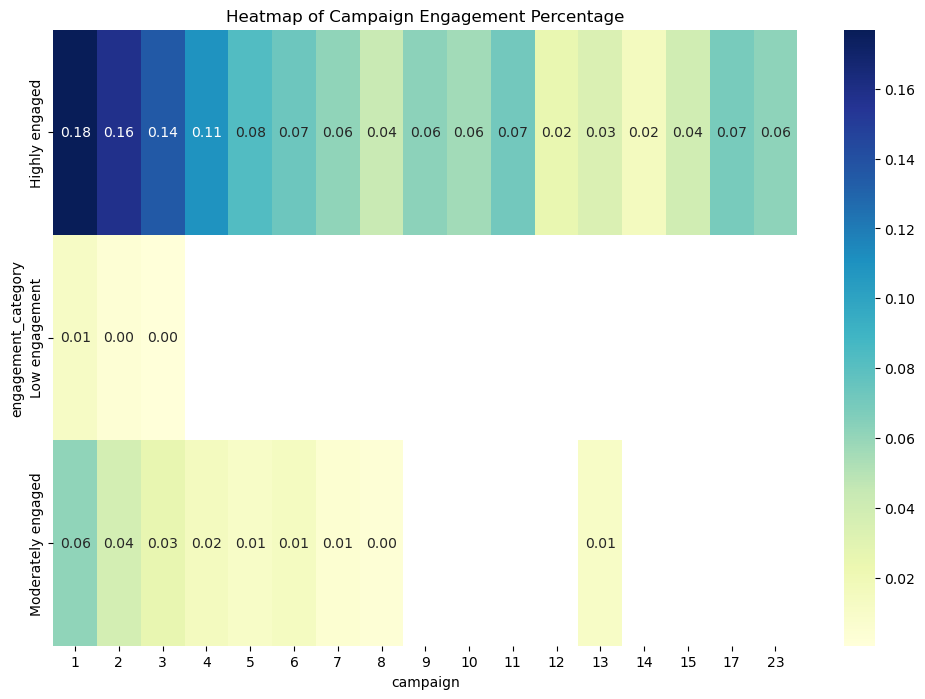

In [126]:
# Pivot the data for heatmap
heatmap_data = campaign_final_merge.pivot(index="engagement_category", columns="campaign", values="percentage")

# Plot heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Heatmap of Campaign Engagement Percentage")
plt.show()

Based on the graph, the campaign that gives the highest probability of engagement is **Campaign 1**. This is indicated by the tallest bar, particularly for the **"Highly engaged"** category, which shows a **high percentage** relative to other campaigns. The significant height of the bars for **Campaign 1** across all engagement categories suggests it has a **higher probability of engaging customers compared to other campaigns**.